# Tema 1: SWAP Test

Curso IAC02.

Autor: Alejandro Mata Ali

En este notebook vamos a implementar el SWAP Test para diferentes estados cuánticos. Vamos a implementar el siguiente circuito:
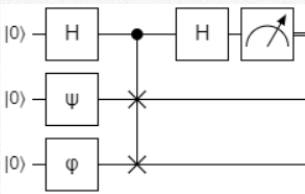

## Librerías

In [ ]:
%%capture
!pip install qiskit
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_histogram
import numpy as np

---
# Circuito cuántico

Para el circuito cuántico tendremos que tener 2n qubits objetivo y un qubit ancilla. Vamos a definirlo ya de forma abstracta con una función que reciba dos estados (y determine automáticamente el número de qubits).

In [ ]:
def SWAP_Circuit(state1: np.array, state2: np.array):
    #Obtenemos el número de qubits como el logaritmo2 de la longitud del vector.
    n = int(np.ceil(np.log2(len(state1))))
    #Registros
    anc = QuantumRegister(1, 'ancilla')
    qr1 = QuantumRegister(n, 'q1')
    qr2 = QuantumRegister(n, 'q2')
    cr = ClassicalRegister(1, 'c')

    #Circuito
    qc = QuantumCircuit(anc, qr1, qr2, cr, name='SWAP')

    #H en la ancilla
    qc.h(anc[0])

    #Inicializamos los estados, también podemos usar StatePreparation
    qc.initialize(state1, qubits=qr1[:], normalize=True)
    qc.initialize(state2, qubits=qr2[:], normalize=True)
    qc.barrier()

    #Control-SWAP para cada pareja de qubits
    qc.cswap(anc[:]*n, qr1[:], qr2[:])
    qc.barrier()

    #H en ancilla
    qc.h(anc[0])
    qc.barrier()

    #Mediciones
    qc.measure(anc[0],0)

    #Esto es por visualización
    decomp_qc = qc.decompose(['State_Preparation'], reps=1)

    return decomp_qc

Ahora definamos dos estados para hacer la operación. Empezamos por dos iguales, para obtener 1.

In [ ]:
#Vectores de estado
state1 = np.array([0.75, 0.5, 1, 2.3, -3, 1j, 4, 3+1j])
state1 /= np.sqrt(sum(state1*np.conjugate(state1)))

state2 = np.array([0.75, 0.5, 1, 2.3, -3, 1j, 4, 3+1j])
state2 /= np.sqrt(sum(state2*np.conjugate(state2)))

Creamos el circuito cuántico.

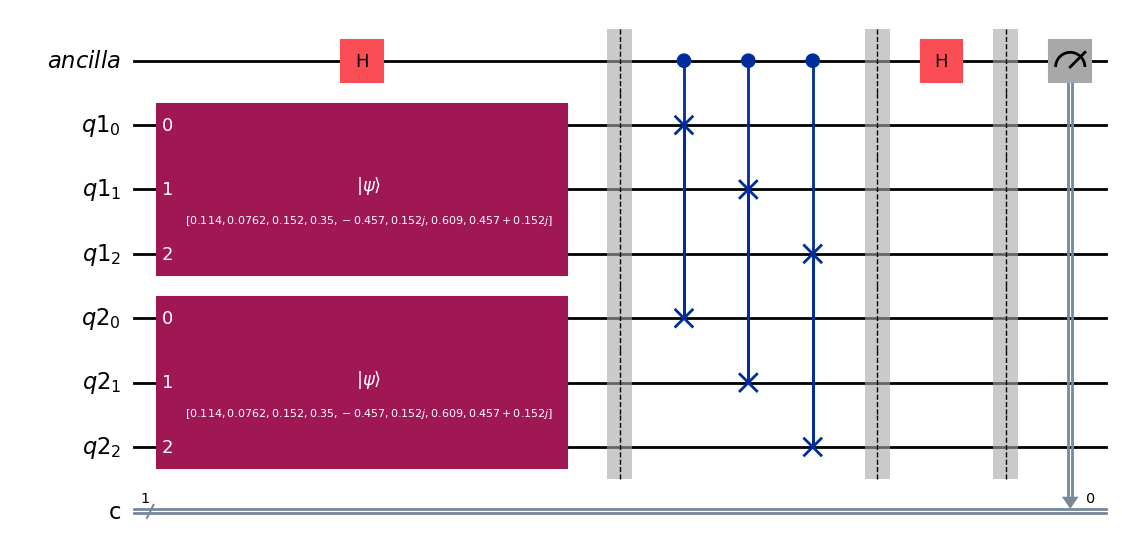

In [ ]:
qc = SWAP_Circuit(state1, state2)

qc.draw('mpl')

---
# Ejecutando el circuito

Ejecutamos el circuito en simulador.

/usr/local/lib/python3.10/dist-packages/qiskit/providers/fake_provider/generic_backend_v2.py:506: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


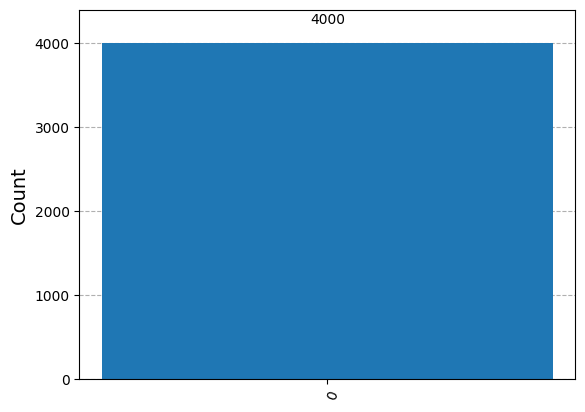

In [ ]:
#Número de shots
n_shots = 4000

#Simulador de 2n+1 qubits
backend = GenericBackendV2(num_qubits=2*int(np.ceil(np.log2(len(state1))))+1)

#Transpilamos
qc_transpiled = transpile(qc, backend)

#Creamos el job con más shots para más precisión
job = backend.run(qc_transpiled, shots=n_shots)
#Obtenemos el resultado y sus cuentas
counts = job.result().get_counts()
#Ploteamos los histogramas de resultados
plot_histogram(counts)

Vamos a calcular el producto escalar como

$$|\langle \psi|\phi \rangle|^2 = 2P(0)-1$$


In [ ]:
proy = 2* ( counts['0']/n_shots) - 1
proy

1.0

Vemos que efectivamente obtenemos 1.

---
# Probamos con otros estados

Ahora haz un circuito para otros estados y mira qué sucede con la precisión con el número de shots.

In [ ]:
#Vectores de estado
state1 = np.array([0.75, 0.5, 1, 2.3, -3, 1j, 4, 3+1j])
state1 /= np.sqrt(sum(state1*np.conjugate(state1)))

state2 = np.array([0.6+0.1j, -0.9+3j, 1.2, 0.2, -1, 0.3+1j, -2+2j, 3-1j])
state2 /= np.sqrt(sum(state2*np.conjugate(state2)))

#Creamos el circuito
qc = SWAP_Circuit(state1, state2)

#Número de shots
n_shots = 4000

#Simulador de 2n+1 qubits
backend = GenericBackendV2(num_qubits=2*int(np.ceil(np.log2(len(state1))))+1)

#Transpilamos
qc_transpiled = transpile(qc, backend)

#Creamos el job con más shots para más precisión
job = backend.run(qc_transpiled, shots=n_shots)
#Obtenemos el resultado y sus cuentas
counts = job.result().get_counts()

#Obtenemos la proyección a partir de las cuentas
proy = 2* ( counts['0']/n_shots) - 1


print('Cuántico: ', proy)
print('Exacto:   ', abs(np.conjugate(state1) @ state2)**2)

/usr/local/lib/python3.10/dist-packages/qiskit/providers/fake_provider/generic_backend_v2.py:506: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


Cuántico:  0.04150000000000009
Exacto:    0.03124668490738293


In [ ]:
#Vectores de estado
state1 = np.array([0.75, 0.5])
state1 /= np.sqrt(sum(state1*np.conjugate(state1)))

state2 = np.array([-0.6+0.1j, -0.9-3j])
state2 /= np.sqrt(sum(state2*np.conjugate(state2)))

#Creamos el circuito
qc = SWAP_Circuit(state1, state2)

#Número de shots
n_shots = 4000

#Simulador de 2n+1 qubits
backend = GenericBackendV2(num_qubits=2*int(np.ceil(np.log2(len(state1))))+1)

#Transpilamos
qc_transpiled = transpile(qc, backend)

#Creamos el job con más shots para más precisión
job = backend.run(qc_transpiled, shots=n_shots)
#Obtenemos el resultado y sus cuentas
counts = job.result().get_counts()

#Obtenemos la proyección a partir de las cuentas
proy = 2* ( counts['0']/n_shots) - 1


print('Cuántico: ', proy)
print('Exacto:   ', abs(np.conjugate(state1) @ state2)**2)

/usr/local/lib/python3.10/dist-packages/qiskit/providers/fake_provider/generic_backend_v2.py:506: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


Cuántico:  0.3414999999999999
Exacto:    0.34343358017228354


In [ ]:
#Vectores de estado
state1 = np.array([0.75, 0.5, 1, 2.3, -3, 1j, 4, 3+1j])
state1 /= np.sqrt(sum(state1*np.conjugate(state1)))

state2 = np.array([0.75, -0.5, 1, -2.3, -3, 1j, -4, 3+1j])
state2 /= np.sqrt(sum(state2*np.conjugate(state2)))

#Creamos el circuito
qc = SWAP_Circuit(state1, state2)

#Número de shots
n_shots = 8000

#Simulador de 2n+1 qubits
backend = GenericBackendV2(num_qubits=2*int(np.ceil(np.log2(len(state1))))+1)

#Transpilamos
qc_transpiled = transpile(qc, backend)

#Creamos el job con más shots para más precisión
job = backend.run(qc_transpiled, shots=n_shots)
#Obtenemos el resultado y sus cuentas
counts = job.result().get_counts()

#Obtenemos la proyección a partir de las cuentas
proy = 2* ( counts['0']/n_shots) - 1


print('Cuántico: ', proy)
print('Exacto:   ', abs(np.conjugate(state1) @ state2)**2)

/usr/local/lib/python3.10/dist-packages/qiskit/providers/fake_provider/generic_backend_v2.py:506: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


Cuántico:  0.00550000000000006
Exacto:    2.72495989691703e-07


A mayor número de shots, mayor precisión obtenemos.